<a href="https://colab.research.google.com/github/NikitaSUAI/EmotionRecognition/blob/main/OMGEmmotion_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных


In [ ]:
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

!cp -r '/content/drive/MyDrive/OMG_EMO' 'OMG_EMO'

BASE_PATH = Path("/content/OMG_EMO")

TRAIN_PATH = BASE_PATH / "train_set.csv"
VAL_PATH = BASE_PATH / "val_set.csv"
TEST_PATH = BASE_PATH / "test_set.csv"

Mounted at /content/drive


# Описательная статистика

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train = pd.read_csv(TRAIN_PATH)
val = pd.read_csv(VAL_PATH)
test = pd.read_csv(TEST_PATH)


video_train = train[train["video"].notna()].copy()
video_test = test[test["video"].notna()].copy()
video_val = val[val["video"].notna()].copy()

video_train["dur"] = video_train["end"] - video_train["start"]
video_test["dur"] = video_test["end"] - video_test["start"]
video_val["dur"] = video_val["end"] - video_val["start"]

text_train = train[train["transcript"].notna()].copy()
text_test = test[test["transcript"].notna()].copy()
text_val = val[val["transcript"].notna()].copy()

f = lambda x: len(x.split())

text_train["n_word"] = text_train["transcript"].apply(f)
text_test["n_word"] = text_test["transcript"].apply(f)
text_val["n_word"] = text_val["transcript"].apply(f)

## Распределение по длительностям

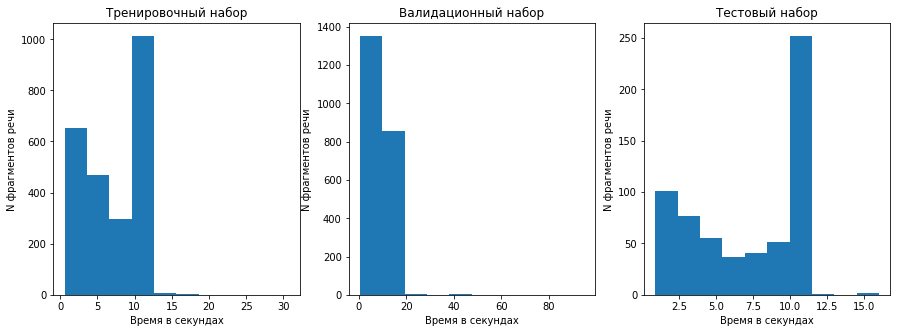

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].hist(video_train["dur"]);
ax[0].set_title("Тренировочный набор")
ax[0].set_xlabel("Время в секундах")
ax[0].set_ylabel("N фрагментов речи")

ax[1].hist(video_test["dur"]);
ax[1].set_title("Валидационный набор")
ax[1].set_xlabel("Время в секундах")
ax[1].set_ylabel("N фрагментов речи")


ax[2].hist(video_val["dur"]);
ax[2].set_title("Тестовый набор")
ax[2].set_xlabel("Время в секундах")
ax[2].set_ylabel("N фрагментов речи");


## Распределение по количеству слов

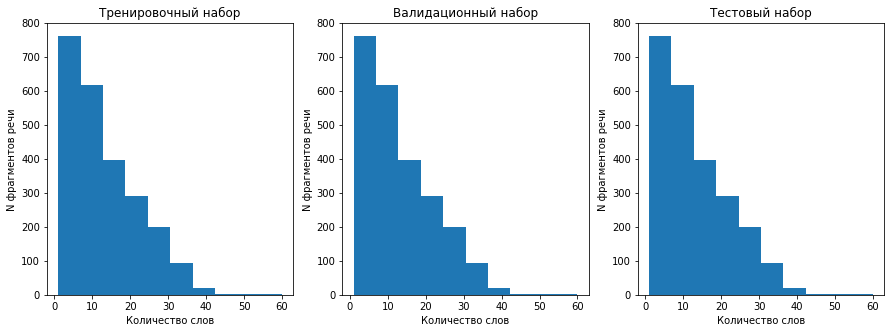

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].hist(text_train["n_word"]);
ax[0].set_title("Тренировочный набор")
ax[0].set_xlabel("Количество слов")
ax[0].set_ylabel("N фрагментов речи")

ax[1].hist(text_train["n_word"]);
ax[1].set_title("Валидационный набор")
ax[1].set_xlabel("Количество слов")
ax[1].set_ylabel("N фрагментов речи")


ax[2].hist(text_train["n_word"]);
ax[2].set_title("Тестовый набор")
ax[2].set_xlabel("Количество слов")
ax[2].set_ylabel("N фрагментов речи");

## Зависимость количества слов и их длительностей

In [ ]:
video_text_train = text_train.dropna().copy()
video_text_test = text_test.dropna().copy()
video_text_val = text_val.dropna().copy()

video_text_train["dur"] = video_text_train["end"] - video_text_train["start"]
video_text_test["dur"] = video_text_test["end"] - video_text_test["start"]
video_text_val["dur"] = video_text_val["end"] - video_text_val["start"]

all_video_text = pd.concat((video_text_train,video_text_val))

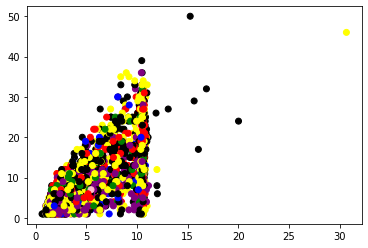

In [ ]:
colors = {0:"red", 1:"green", 2:"blue", 3:"yellow", 4:"black", 5:"purple", 6:"pink"}
plt.scatter(all_video_text.dur, all_video_text.n_word, c=all_video_text.EmotionMaxVote.map(colors))

## Получим самые часто-встречаемые слова

In [ ]:
!pip install pymystem3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))

lemmatizer = WordNetLemmatizer()
all_words = []
all_words_wo_stops = []

def tokenize_lemmatize(sentence):
  tokens = sentence.lower().strip().split()
  lems = [lemmatizer.lemmatize(token) for token in tokens]
  all_words.extend(lems)
  lems = [token for token in lems if token not in stop_words]
  all_words_wo_stops.extend(lems)
  return " ".join(lems)
all_video_text["tokens"] = all_video_text["transcript"].apply(tokenize_lemmatize)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Text(0.5, 1.0, 'ТОП 50 самых частых слов')

<Figure size 4320x720 with 0 Axes>

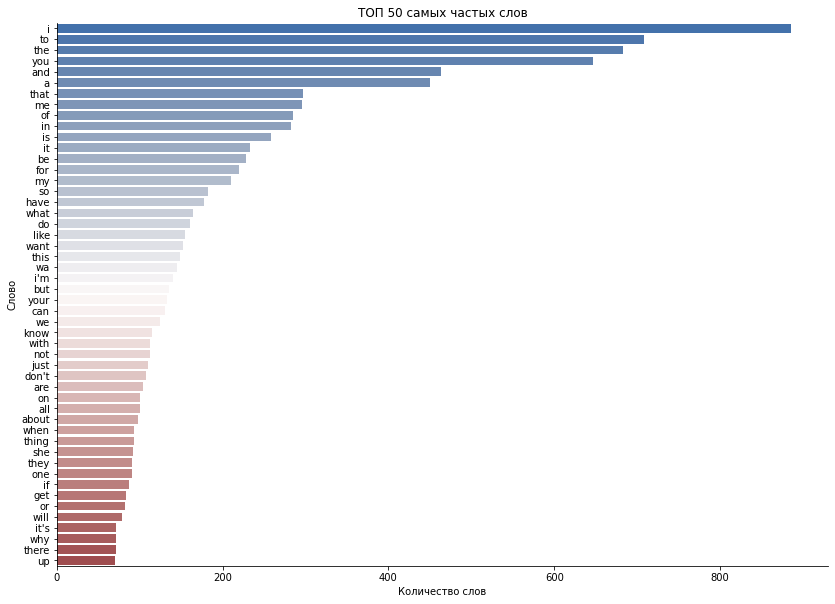

In [ ]:
import seaborn as sns

counts = pd.DataFrame(pd.Series(all_words).value_counts())
counts["Слово"] = counts.index 
counts = counts.rename(columns={0: 'Количество слов'})
plt.figure(figsize=(60,10))
sns.catplot(x = "Количество слов" , y="Слово",  kind="bar", palette="vlag", data=counts.head(50), height=8.27, aspect=11.7/8.27)
plt.title('ТОП 50 самых частых слов')

In [ ]:
stop_words.extend(["i'm", "wa", "that's", "u", "i've", "can't"])
stop_words = list(set(stop_words))
all_words_wo_stops = []
all_words = []
def tokenize_lemmatize(sentence):
  tokens = sentence.lower().strip().split()
  lems = [lemmatizer.lemmatize(token) for token in tokens]
  all_words.extend(lems)
  lems = [token for token in lems if token not in stop_words]
  all_words_wo_stops.extend(lems)
  return " ".join(lems)
all_video_text["tokens"] = all_video_text["transcript"].apply(tokenize_lemmatize)

Text(0.5, 1.0, 'ТОП 50 самых частых слов')

<Figure size 4320x720 with 0 Axes>

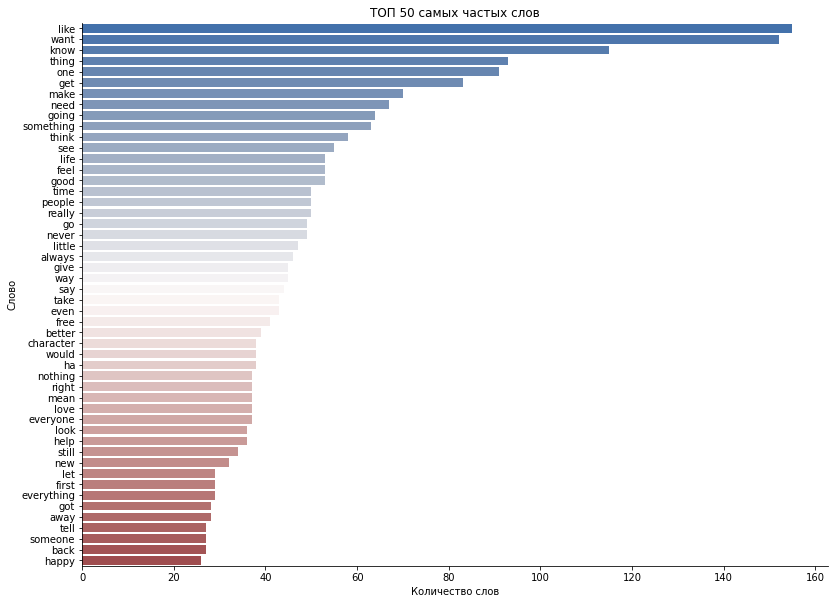

In [ ]:
counts = pd.DataFrame(pd.Series(all_words_wo_stops).value_counts())
counts["Слово"] = counts.index 
counts = counts.rename(columns={0: 'Количество слов'})
plt.figure(figsize=(60,10))
sns.catplot(x = "Количество слов" , y="Слово",  kind="bar", palette="vlag", data=counts.head(50), height=8.27, aspect=11.7/8.27)
plt.title('ТОП 50 самых частых слов')

## Распределение классов

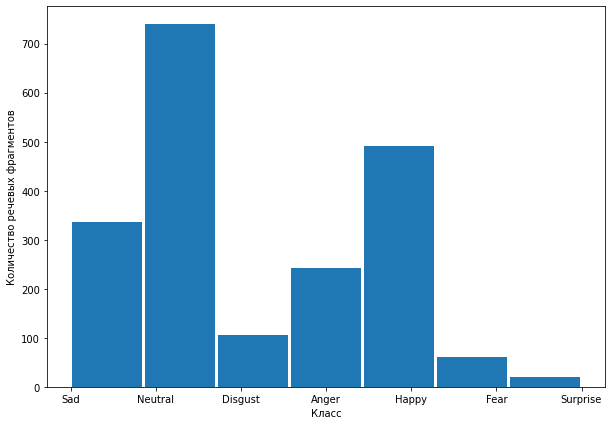

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
all_video_text["EmotionMaxVote_int"] = all_video_text["EmotionMaxVote"]
all_video_text["EmotionMaxVote"] = all_video_text["EmotionMaxVote"].map({0:"Anger", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Neutral", 5:"Sad", 6:"Surprise"})
ax.hist(all_video_text["EmotionMaxVote"], rwidth=0.95, bins=7)
ax.set_xlabel("Класс")
ax.set_ylabel("Количество речевых фрагментов");

## Посчитаем мощность сигнала в зависимости, в зависимости от класса

In [ ]:
f = lambda x: str(BASE_PATH / "data" / x)
all_video_text["path"] = all_video_text["path"].apply(f) 

In [ ]:
from scipy.io import wavfile
energy = lambda x: (wavfile.read(x)[1]**2).mean()
power = lambda x: wavfile.read(x)[1].mean()
variance = lambda x: wavfile.read(x)[1].var()

all_video_text["energy"] = all_video_text["path"].apply(energy) 
all_video_text["power"] = all_video_text["path"].apply(power) 
all_video_text["variance"] = all_video_text["path"].apply(variance) 


### Энергия сигнала в дБ

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


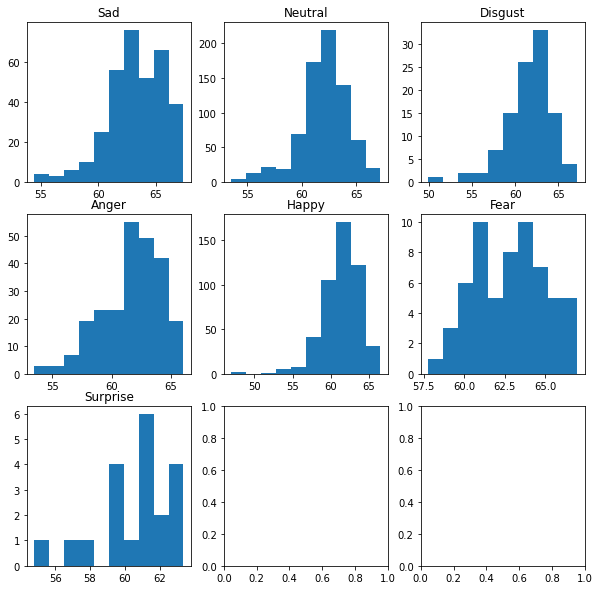

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(10, 10))
to_db = lambda x: 10 * ((np.log(x/0.001))/np.log(10))

classes = all_video_text["EmotionMaxVote"].unique()
for idx, label in enumerate(classes):
  scope = all_video_text[all_video_text.EmotionMaxVote == label]
  ax[idx // 3, idx % 3].hist(to_db(scope["energy"]))
  ax[idx // 3, idx % 3].set_title(label)

### Мощность сигнала в дециБелах

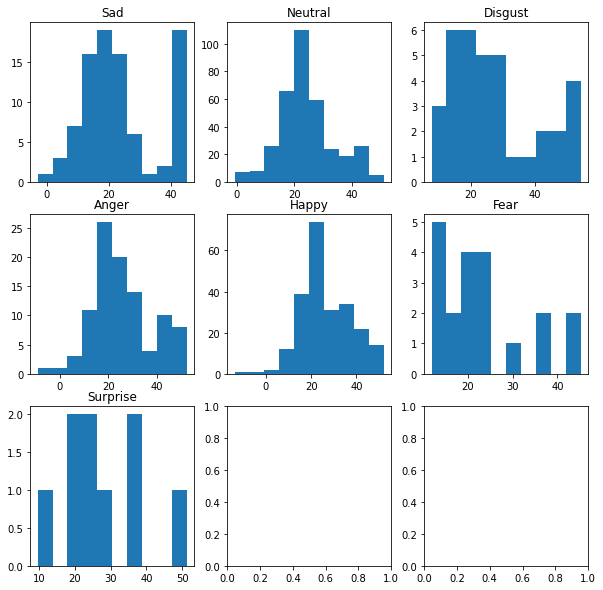

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(10, 10))

classes = all_video_text["EmotionMaxVote"].unique()
for idx, label in enumerate(classes):
  scope = all_video_text[all_video_text.EmotionMaxVote == label]
  ax[idx // 3, idx % 3].hist(to_db(scope["power"]))
  ax[idx // 3, idx % 3].set_title(label)

## Почитаем количестов слов в сообщении после фильтрации

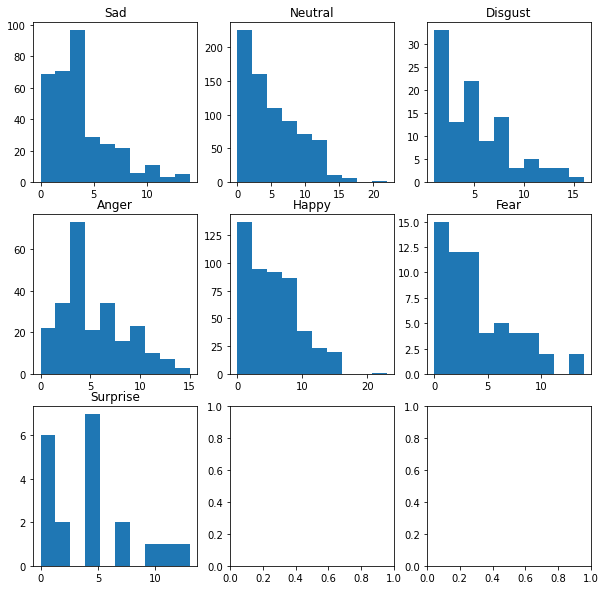

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(10, 10))

f = lambda x: len(x.split())
all_video_text["n_word"] = all_video_text["tokens"].apply(f)

classes = all_video_text["EmotionMaxVote"].unique()
for idx, label in enumerate(classes):
  scope = all_video_text[all_video_text.EmotionMaxVote == label]
  ax[idx // 3, idx % 3].hist(scope["n_word"])
  ax[idx // 3, idx % 3].set_title(label)

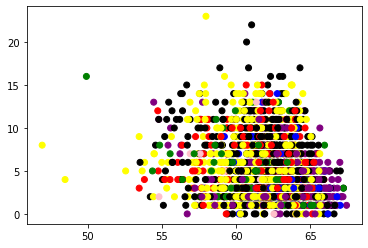

In [ ]:
colors = {"Anger":"red", "Disgust":"green", "Fear":"blue", "Happy":"yellow", "Neutral":"black", "Sad":"purple", "Surprise":"pink"}
plt.scatter(to_db(all_video_text["energy"]), all_video_text.n_word, c=all_video_text.EmotionMaxVote.map(colors))

## Посчитаем зависимость между целевыми переменными

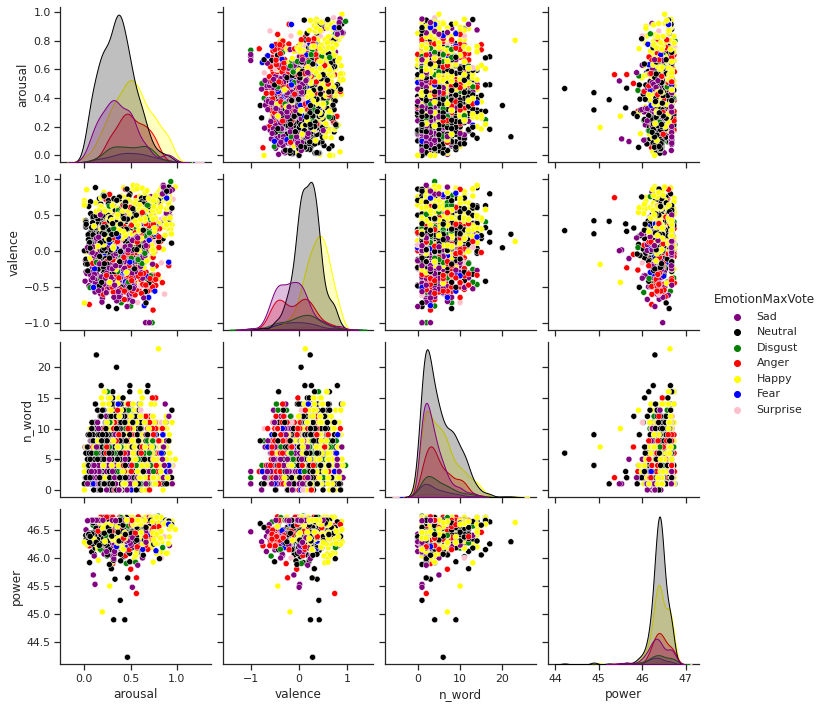

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
all_video_text["power"] = to_db(all_video_text["power"])
all_video_text = all_video_text.reset_index()
sns.pairplot(all_video_text, vars=["arousal", "valence", "n_word", "power"], hue="EmotionMaxVote", palette=colors);

## Зависимость между целевыми переменными

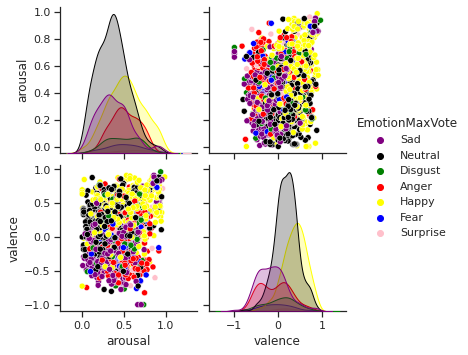

In [ ]:
import seaborn as sns
colors = {"Anger":"red", "Disgust":"green", "Fear":"blue", "Happy":"yellow", "Neutral":"black", "Sad":"purple", "Surprise":"pink"}
sns.pairplot(all_video_text, vars=["arousal", "valence"], hue="EmotionMaxVote", palette=colors);